# 函数工具

这一章要讲的是迭代器、生成器和装饰器，这些都是函数工具。有人把它们称为 **DIG**（Decorator，Iterator，Generator）—— 它们都是真正掌握 Python 的关键。

## 迭代器（Iterator）

我们已经见过 Python 中的所有容器，都是可迭代的 —— 准确地讲，是可以通过迭代遍历每一个元素：

In [5]:
string = "this is a string."
list = ['item 1', 'item 2', 3, 5]
set = (1, 2, 3, 4, 5)
for c in string:
    print(c, end=', ')
print()
for L in list:
    print(L, end=', ')
print()
for s in set:
    print(s, end=', ')
print()

t, h, i, s,  , i, s,  , a,  , s, t, r, i, n, g, ., 
item 1, item 2, 3, 5, 
1, 2, 3, 4, 5, 


有个内建函数，就是用来把一个 “可迭代对象”（Iterable）转换成 “迭代器”（Iterator）的 —— `iter()`。

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

j='python'
type(j)
i = iter("Python")
type(i)
s = iter((1, 2, 3, 4, 5))
type(s)
L = iter(['item 1', 'item 2', 3, 5])
type(L)

str

str_iterator

tuple_iterator

list_iterator

迭代器如何使用呢？有个 `next()` 函数：

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

i = iter("Python")
next(i)
next(i)
next(i)
next(i)
next(i)
next(i)
# next(i) 前面已经到 'n' 了，再调用就会有 StopIteration 错误提示。

'P'

'y'

't'

'h'

'o'

'n'

在 `i` 这个迭代器里一共有 6 个元素，所以，`next(i)` 在被调用 6 次之后，就不能再被调用了，一旦再被调用，就会触发 StopIteration 错误。

那我们怎么自己写一个迭代器呢？

迭代器是个 Object，所以，写迭代器的时候写的是 Class，比如，我们写一个数数的迭代器，Counter：

In [4]:
class Counter(object):
    def __init__(self, start, stop):
        self.current = start
        self.stop = stop
    def __iter__(self):
        return self
    def __next__(self):
        if self.current > self.stop:
            raise StopIteration
        else:
            c = self.current
            self.current += 1
        return c

c = Counter(11, 20)
next(c)
next(c)
next(c)
for c in Counter(101, 105):
    print(c, end=', ')
type(Counter)

11

12

13

101, 102, 103, 104, 105, 

type

这里的重点在于两个函数的存在，`__iter__(self)` 和 `__next__(self)`。

```python
def __iter__(self):
    return self
```

这两句是约定俗成的写法，写上它们，`Counter` 这个类就被会被识别为 Iterator 类型。而后再有 `__next__(self)` 的话，它就是个完整的迭代器了。除了可以用 `for loop` 之外，也可以用 `while loop` 去遍历迭代器中的所有元素：

In [64]:
class Counter(object):
    def __init__(self, start, stop):
        self.current = start
        self.stop = stop
    def __iter__(self):
        return self
    def __next__(self):
        if self.current > self.stop:
            raise StopIteration
        else:
            c = self.current
            self.current += 1
        return c


for c in Counter(101, 103):
    print(c, sep=', ')

c = Counter(201, 203)
while True:
    try:
        print(next(c), sep=', ')
    except StopIteration:
        break

101
102
103
201
202
203


## 生成器（Generator）

那用函数（而不是 Class）能不能写一个 Counter 呢？答案是能，用生成器（Generator）就行。

In [7]:
def counter(start, stop):
    while start <= stop:
        yield start
        start += 1
for i in counter(101, 105):
    print(i)

i=counter(1,5)
next(i)
next(i)
next(i)

101
102
103
104
105


1

2

3

哎呀！怎么感觉这个简洁很多呢？

不过，是否简洁并不是问题，这次看起来用生成器更简单，无非是因为当前的例子更适合用生成器而已。在不同的情况下，用迭代器和用生成器各有各的优势。

这里的关键在于 `yield` 这个语句。它和 `return` 最明显的不同在于，在它之后的语句依然会被执行 —— 而 `return` 之后的语句就被忽略了。

但正因为这个不同，在写生成器的时候，只能用 `yield`，而没办法使用 `return` —— 你现在可以回去把上面代码中的 `yield` 改成 `return` 看看，然后体会一下它们之间的不同。

生成器函数被 `next()` 调用后，执行到 `yield` 生成一个值返回（然后继续执行 `next()` 外部剩余的语句）；下次再被 `next()` 调用的时候，从上次生成返回值的 `yield` 语句处继续执行…… 如果感觉费解，就多读几遍 —— 而后再想想若是生成器中有多个 `yield` 语句会是什么情况？

还有一种东西，叫做生成器表达式。先看个例子：

In [84]:
even = (e for e in range(10) if not e % 2)
# odd = (o for o in range(10) if o % 2)
print(even)
for e in even:
    print(e)

<generator object <genexpr> at 0x107cc0048>
0
2
4
6
8


其实，这种表达式我们早就在 List Comprehension 里见过 —— 那就是通过生成器表达式完成的。

**注意**

仔细看 `even = (e for e in range(10) if not e % 2)` 中最外面那层括号，用了圆括号，`even` 就是用生成器创造的迭代器（Iterator），若是用了方括号，那就是用生成器创造的列表（List）—— 当然用花括号 `{}` 生成的就是集合（Set）……

In [77]:
# even = (e for e in range(10) if not e % 2)
odd = [o for o in range(10) if o % 2]
print(odd)
for o in odd:
    print(o)

[1, 3, 5, 7, 9]
1
3
5
7
9


In [78]:
# even = (e for e in range(10) if not e % 2)
odd = {o for o in range(10) if o % 2}
print(odd)
for o in odd:
    print(o)

{1, 3, 5, 7, 9}
1
3
5
7
9


**生成器表达式必须在括号内使用**（参见官方 [HOWTOS](https://docs.python.org/3/howto/functional.html#generator-expressions-and-list-comprehensions)），包括函数的参数括号，比如：

In [11]:
even=(e for e in range(10) if not e % 2)
print(even)
sum_of_even = sum(e for e in range(10) if not e % 2)
print(sum_of_even)

<generator object <genexpr> at 0x00000170C4A96E40>
20


函数内部当然可以包含其它的函数，以下就是一个函数中包含着其它函数的结构示例：

```python
def a_func():
    def b_func():
        pass
    def c_func():
        pass
        def d_func():
            pass
        b_func()
    return True
```

想象一下，如果，我们让一个函数返回的是另外一个函数呢？我们一步一步来：

In [12]:
def a_func():
    def b_func():
        print("Hi, I'm b_func!")
    print("Hi, I'm a_func!")
a_func()

Hi, I'm a_func!


In [3]:
def a_func():
    def b_func():
        print("Hi, I'm b_func!")
    print("Hi, I'm a_func!")
    b_func()
a_func()

Hi, I'm a_func!
Hi, I'm b_func!


上一个代码，我们可以写成这样 —— 让 `a_func()` 将它内部的 `b_func()` 作为它的返回值：

In [5]:
def a_func():
    def b_func():
       print("Hi, I'm b_func!")
    print("Hi, I'm a_func!")
    return b_func()
a_func()

Hi, I'm a_func!
Hi, I'm b_func!


如果我们在 `return` 语句里只写函数名呢？好像这样：

In [6]:
def a_func():
    def b_func():
        print("Hi, I'm b_func!")
    print("Hi, I'm a_func!")
    return b_func
a_func()

Hi, I'm a_func!


<function __main__.a_func.<locals>.b_func()>

这次返回的不是调用 `b_func()` 这个函数的执行结果，返回的是 `b_func` 这个*函数本身*。

## 装饰器（Decorator）

### 函数也是对象

这是关键：

> 函数本身也是对象（即，Python 定义的某个 Class 的一个 Instance）。

于是，函数本身其实可以与其它的数据类型一样，作为其它函数的参数或者返回值。

让我们分步走 —— 注意，在以下代码中，`a_decorator` 返回的是一个函数的调用 `wrapper()`，而不是 `wrapper` 这个函数本身：

In [7]:
def a_decorator(func):
    def wrapper():
        print('We can do sth. before a func is called...')
        func()
        print('... and we can do sth. after it is called...')
    return wrapper()

def a_func():
    print("Hi, I'm a_func!")
    
a_func()
a_decorator(a_func)

Hi, I'm a_func!
We can do sth. before a func is called...
Hi, I'm a_func!
... and we can do sth. after it is called...


如果返回的是函数本身，`wrapper`，输出结果跟你想的并不一样：

In [8]:
def a_decorator(func):
    def wrapper():
        print('We can do sth. before a func is called...')
        func()
        print('... and we can do sth. after it is called...')
    return wrapper  # 

def a_func():
    print("Hi, I'm a_func!")
    
a_func()
a_decorator(a_func)

Hi, I'm a_func!


<function __main__.a_decorator.<locals>.wrapper()>

### 装饰器操作符

不过，Python 提供了一个针对函数的操作符 `@`，它的作用是…… 很难一下子说清楚，先看看以下代码：

In [9]:
def a_decorator(func):
    def wrapper():
        print('We can do sth. before calling a_func...')
        func()
        print('... and we can do sth. after it was called...')
    return wrapper

@a_decorator
def a_func():
    print("Hi, I'm a_func!")
    
a_func()

We can do sth. before calling a_func...
Hi, I'm a_func!
... and we can do sth. after it was called...


注意：以上的代码中，`a_decorator(func)` 返回的是 `wrapper` 这个函数本身。

在我们定义 `a_func()` 的时候，在它之前，加上了一句 `@a_decorator`；这么做的结果是：

> 每次 `a_func()` 在被调用的时候，因为它之前有一句 `@a_decorator`，所以它会先被当作参数传递到 `a_decorator(func)` 这个函数中…… 而后，真正的执行，是在 `a_decorator()` 里被完成的。

—— 被 `@` 调用的函数，叫做 “装饰器”（Decorator），比如，以上代码中的 `a_decorator(func)`。

现在可以很简单直接地说清楚装饰器的作用了：

```python
@a_decorator
def a_func():
    ...
```

等价于

```python
def a_func():
    ...
a_func = a_decorator(a_func)
```

就是用 `a_decorator` 的调用结果替换掉原来的函数。`a_decorator` 返回值是什么，以后调用 `a_func` 时就是在调用这个返回值，而 `a_decorator` 本身此时已经执行完毕了。

### 装饰器的用途

Decorator 最常用的场景是什么呢？最常用的场景就是用来改变其它函数的行为。

In [46]:
def an_output():
    return 'The quick brown fox jumps over the lazy dog.'
print(an_output())

The quick brown fox jumps over the lazy dog.


In [47]:
def uppercase(func):
    def wrapper():
        original_result = func()
        modified_restult = original_result.upper()
        return modified_restult
    return wrapper

@uppercase
def an_output():
    return 'The quick brown fox jumps over the lazy dog.'
print(an_output())

THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG.


模块加载 ->> 遇到@，执行uppercase函数，传入an_output函数 ->> 生成uppercase.<locals>.wrapper函数并命名为an_output，其实是覆盖了原同名函数 ->> 调用output() ->> 去执行uppercase.<locals>.wrapper() ->> wrapper内部持有原an_output函数引用(func)，调用func() ->>继续执行完wrapper函数

你还可以给一个函数加上一个以上的装饰器：

In [50]:
def uppercase(func):
    def wrapper():
        original_result = func()
        modified_restult = original_result.upper()
        return modified_restult
    return wrapper
def strong(func):
    def wrapper():
        original_result = func()
        modified_restult = '<strong>'+original_result+'</strong>'
        return modified_restult
    return wrapper

@strong
@uppercase
def an_output():
    return 'The quick brown fox jumps over the lazy dog.'
print(an_output())

<strong>THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG.</strong>


你把两个装饰器的顺序调换一下写成下面这样试试：

```python
@uppercase
@strong
def an_output():
...
```
装饰器的执行顺序是 “自下而上” —— 其实是 “由里到外” 更为准确。体会一下。
```python
@test2
@test1
def add(a, b):
    print(a+b)
```
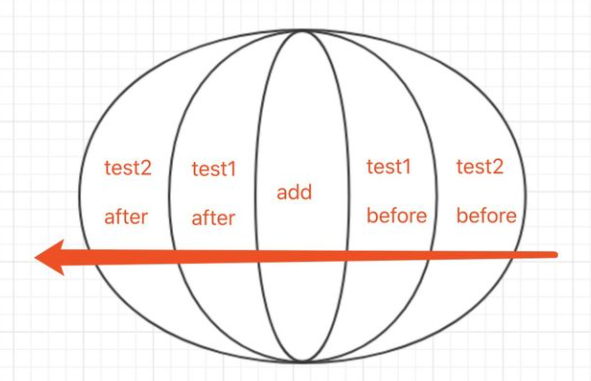

### 装饰带有参数的函数

到现在我们见到的使用装饰器的函数都是没有参数的：`an_output` 以及之前的 `a_func`。

如果被装饰的函数有参数怎么办？装饰器自身内部又应该怎么写？

这时候，Python 的 `*args` and `**kwargs` 的威力就显现出来了 —— 之前怕麻烦没有通过仔细反复阅读搞定这 “一个星号、两个星号、直接晕倒” 的知识点的人，现在恐怕要吃亏了……

装饰器函数本身这么写：

```python
def a_decorator(func):
    def wrapper(*args, **kwargs):
        return original_result
    # ...   
    return wrapper
```

在这里，`(*args, **kwargs)` 非常强大，它可以匹配所有函数传进来的所有参数…… 准确地讲，`*args` 接收并处理所有传递进来的位置参数，`**kwargs` 接收并处理所有传递进来的关键字参数。

假设我们有这么个函数：

In [54]:
def say_hi(greeting, name=None):
    return greeting + '! ' + name + '.'

print(say_hi('Hello', 'Jack'))

Hello! Jack.


如果我们想在装饰器里对函数名、参数，都做些事情 —— 比如，我们写个 `@trace` 用来告诉用户调用一个函数的时候都发生了什么……

In [26]:
def trace(func):
    def wrapper(*args, **kwargs):
        print(f"Trace: You've called a function: {func.__name__}(),",
              f"with args: {args}; kwargs: {kwargs}")
    
        original_result = func(*args, **kwargs)
        print(f"Trace: {func.__name__}{args} returned: {original_result}")
        return original_result
    return wrapper

@trace
def say_hi(greeting, name=None):
    return greeting + '! ' + name + '.'

print(say_hi('Hello', name='Jack'))

Trace: You've called a function: say_hi(), with args: ('Hello',); kwargs: {'name': 'Jack'}
Trace: say_hi('Hello',) returned: Hello! Jack.
Hello! Jack.


有了以上的基础知识之后，再去阅读 Python Decorator Library 的 Wiki 页面就会轻松许多：

> https://wiki.python.org/moin/PythonDecoratorLibrary

### 学会装饰器究竟有多重要？

装饰器一定要学会 —— 因为很多人就是不会。

Oreilly.com 上有篇文章，《5 reasons you need to learn to write Python decorators》中，其中的第五条竟然是：**Boosting your career**!

> Writing decorators isn't easy at first. It's not rocket science, but takes enough effort to learn, and to grok the nuances involved, that many developers will never go to the trouble to master it. And that works to your advantage. When you become the person on your team who learns to write decorators well, and write decorators that solve real problems, other developers will use them. Because once the hard work of writing them is done, decorators are so easy to use. This can massively magnify the positive impact of the code you write. And it just might make you a hero, too.
> 
> As I've traveled far and wide, training hundreds of working software engineers to use Python more effectively, teams have consistently reported writing decorators to be one of the most valuable and important tools they've learned in my advanced Python programming workshops.

为什么有那么多人就是学不会呢？—— 只不过是因为在此之前，遇到 `*args` `**kwargs` 的时候，“一个星号、两个星号、直接晕倒”…… 而后并未再多挣扎一下。

<a href="./Part.3.B.4.regex.ipynb" ><small>Next Page</small></a>